In [7]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
vertices = [
(0., 0.),
(0., 1.),
(1., 1.),
(1., 0.),
(0., 0.)
]
transformedVertices = []
H = np.float32([[1.0,0.2,0.4],[0.0,1.1,-0.2],[0.27,0.15,0.9]])
for i in range(5):
    nx = H[0][0]*vertices[i][0]+H[0][1]*vertices[i][1]+H[0][2]
    ny = H[1][0]*vertices[i][0]+H[1][1]*vertices[i][1]+H[1][2]
    nz = H[2][0]*vertices[i][0]+H[2][1]*vertices[i][1]+H[2][2]
    transformedVertices.append((nx/nz,ny/nz))

In [8]:
codes = [Path.MOVETO,
Path.LINETO,
Path.LINETO,
Path.LINETO,
Path.CLOSEPOLY,
]

path = Path(vertices, codes)
transformedPath = Path(transformedVertices, codes)

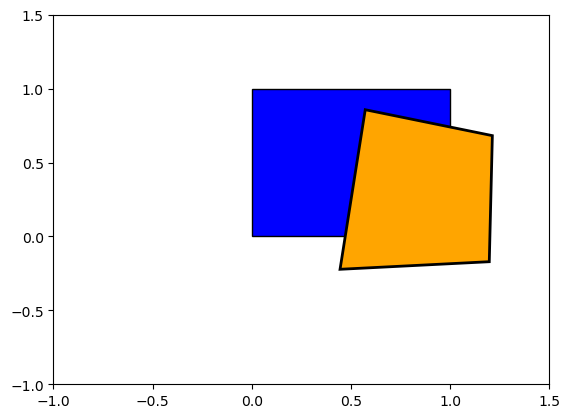

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='blue', lw=1)
transformedPatch = patches.PathPatch(transformedPath, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.add_patch(transformedPatch)
ax.set_xlim(-1,1.5)
ax.set_ylim(-1,1.5)
plt.show()

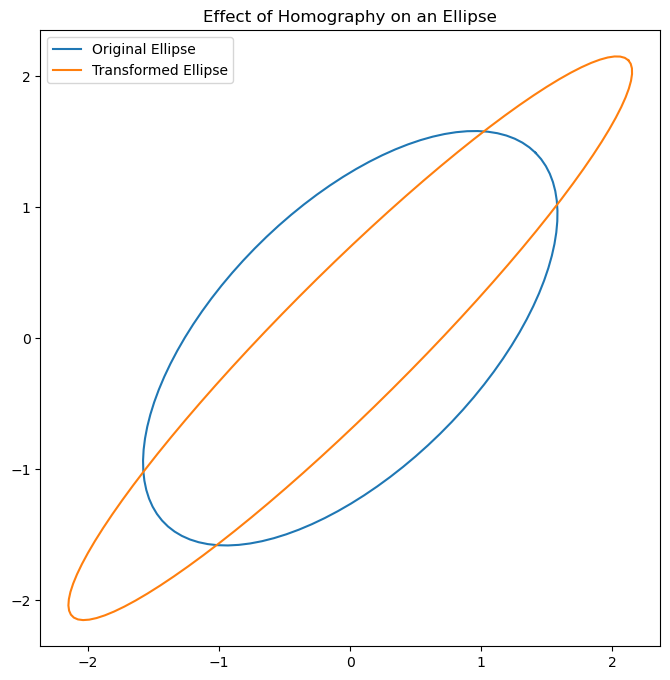

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ellipse(center, axes, angle, num_points=100):
    t = np.linspace(0, 2*np.pi, num_points)
    ellipse = np.array([axes[0]*np.cos(t), axes[1]*np.sin(t)])
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotated_ellipse = np.dot(rotation_matrix, ellipse)
    return rotated_ellipse + np.array(center).reshape(2, 1)

def apply_homography(H, points):
    points_homogeneous = np.vstack((points, np.ones((1, points.shape[1]))))
    transformed_points_homogeneous = np.dot(H, points_homogeneous)
    return transformed_points_homogeneous[:2] / transformed_points_homogeneous[2]

# Define la elipse original
center = (0, 0)
axes = (2, 1)  # Semiejes mayor y menor
angle = np.pi/4  # Ángulo de rotación en radianes

# Genera puntos de la elipse
ellipse_points = generate_ellipse(center, axes, angle)

# Define una matriz de homografía de ejemplo
H = np.array([[1, 0.5, 0],
              [0.5, 1, 0],
              [0, 0, 1]])

# Aplica la homografía a los puntos de la elipse
transformed_ellipse_points = apply_homography(H, ellipse_points)

# Graficar la elipse original y la transformada
plt.figure(figsize=(8, 8))
plt.plot(ellipse_points[0], ellipse_points[1], label='Original Ellipse')
plt.plot(transformed_ellipse_points[0], transformed_ellipse_points[1], label='Transformed Ellipse')
plt.axis('equal')
plt.legend()
plt.title('Effect of Homography on an Ellipse')
plt.show()
